# Intro to scikit-learn
Scikit-learn is machine learning library for Python. It includes implementation of several clustering, classification and regression algorithms. [Documentation of scikit-learn](http://scikit-learn.org/stable/documentation.html) gives an overview of all the algorithms available in this library. This notebook assumes that you are familiar with basics of machine learning.

In this tutorial, we learn to:

* load MNIST dataset and visualize some examples
* perform unsupervised learning using k-means clustering and spectral clustering
* perform supervised learning using classifiers
* compute classification metrics  
* display confusion matrix


## Import necessary modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn import metrics

## Load the MNIST Datasets

In [2]:
dataset = load_digits()
print "Number of Samples: %d" %len(dataset.target)

Number of Samples: 1797


In [3]:
print "Output Categories: %s" %dataset.target_names

Output Categories: [0 1 2 3 4 5 6 7 8 9]


In [4]:
features = dataset.data
print "Feature Vectors: %s" %features

Feature Vectors: [[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


In [5]:
labels = dataset.target
print "Labels: %s" %labels

Labels: [0 1 2 ..., 8 9 8]


## Divide the dataset into training and test sets

In [6]:
trainIdx = np.random.rand(len(labels)) < 0.8
features_train = features[trainIdx]
labels_train = labels[trainIdx]
features_test = features[~trainIdx]
labels_test = labels[~trainIdx]
print "Number of training samples: ",features_train.shape[0]
print "Number of test samples: ",features_test.shape[0]
print "Feature vector dimensionality: ",features_train.shape[1]

Number of training samples:  1442
Number of test samples:  355
Feature vector dimensionality:  64


## k-means Clustering

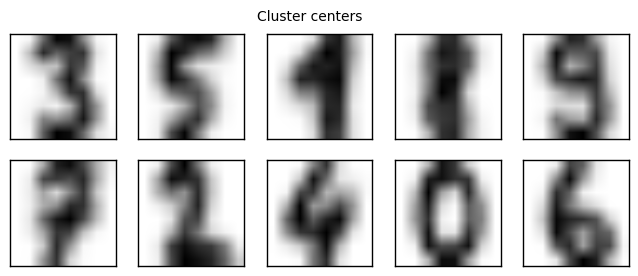

In [7]:
# import modules
from sklearn.cluster import KMeans
num_clusters = 10
mdl = KMeans(num_clusters)
clusters = mdl.fit_predict(features)
fig = plt.figure(figsize=(8, 3))
for c in range(num_clusters):
    ax = fig.add_subplot(2, 5, 1 + c, xticks=[], yticks=[])
    ax.imshow(mdl.cluster_centers_[c].reshape((8, 8)), cmap=plt.cm.binary)
plt.suptitle('Cluster centers')
plt.show()


## Spectral Clustering

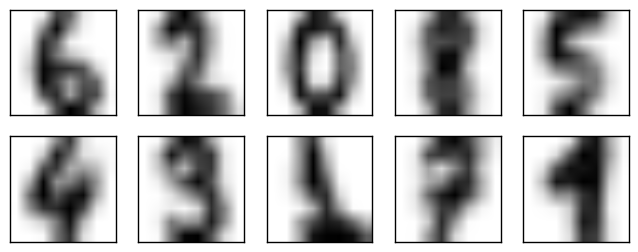

In [8]:
from sklearn.cluster import SpectralClustering
num_clusters = 10
mdl = SpectralClustering(n_clusters=num_clusters,
                        eigen_solver='arpack',
                      affinity="nearest_neighbors")
clusters = mdl.fit_predict(features)
fig = plt.figure(figsize=(8, 3))
for c in range(num_clusters):
    ax = fig.add_subplot(2, 5, 1 + c, xticks=[], yticks=[])
    f = features[clusters==c,:]
    cluster_center = np.mean(f, axis=0)
    ax.imshow(cluster_center.reshape((8, 8)), cmap=plt.cm.binary)
plt.show()

## k-Nearest Neighbor (kNN) Classification

In [9]:
# import modules
from sklearn.neighbors import KNeighborsClassifier
# initiate the classifier
knn = KNeighborsClassifier(n_neighbors=3)
# fit the classifier model with training data
knn.fit(features_train, labels_train)
# predict the output labels of test data
labels_pred = knn.predict(features_test)
# print classification metrics 
print metrics.classification_report(labels_test, labels_pred)
# print confusion matrix
print metrics.confusion_matrix(labels_test, labels_pred)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.93      1.00      0.96        40
          2       1.00      1.00      1.00        32
          3       0.97      1.00      0.99        35
          4       0.97      1.00      0.99        36
          5       1.00      0.97      0.99        37
          6       1.00      1.00      1.00        34
          7       1.00      1.00      1.00        37
          8       1.00      0.93      0.96        40
          9       0.92      0.89      0.91        27

avg / total       0.98      0.98      0.98       355

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 36  0  0  0  1]
 [ 0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0]
 [ 0  2  0  0  0  0  0  0 37  1]
 [ 0  1  0  1  1  0  0  0  0 24]]


## Support Vector Machines (SVM) Classification

In [10]:
from sklearn.svm import SVC # "Support Vector Classifier"
svm = SVC(kernel='linear')
svm.fit(features_train, labels_train)
# predict the output labels of test data
labels_pred = svm.predict(features_test)
# print classification metrics 
print metrics.classification_report(labels_test, labels_pred)
# print confusion matrix
print metrics.confusion_matrix(labels_test, labels_pred)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.89      1.00      0.94        40
          2       1.00      1.00      1.00        32
          3       0.97      1.00      0.99        35
          4       1.00      1.00      1.00        36
          5       1.00      0.97      0.99        37
          6       1.00      1.00      1.00        34
          7       1.00      0.97      0.99        37
          8       0.95      0.88      0.91        40
          9       0.96      0.93      0.94        27

avg / total       0.98      0.97      0.97       355

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 36  0  0  0  1]
 [ 0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  1  0  0  0 36  0  0]
 [ 0  5  0  0  0  0  0  0 35  0]
 [ 0  0  0  0  0  0  0  0  2 25]]


## Logistic Regression Classification

In [11]:
from sklearn.linear_model import LogisticRegression
mdl = LogisticRegression()
mdl.fit(features_train, labels_train)
# predict the output labels of test data
labels_pred = mdl.predict(features_test)
# print classification metrics 
print metrics.classification_report(labels_test, labels_pred)
# print confusion matrix
print metrics.confusion_matrix(labels_test, labels_pred)

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        37
          1       0.91      0.97      0.94        40
          2       1.00      0.94      0.97        32
          3       0.92      0.97      0.94        35
          4       0.97      0.97      0.97        36
          5       0.97      0.97      0.97        37
          6       1.00      1.00      1.00        34
          7       0.94      0.92      0.93        37
          8       0.86      0.93      0.89        40
          9       0.96      0.81      0.88        27

avg / total       0.95      0.95      0.95       355

[[36  0  0  0  0  1  0  0  0  0]
 [ 0 39  0  0  1  0  0  0  0  0]
 [ 0  0 30  2  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  1  0]
 [ 0  0  0  0 35  0  0  0  1  0]
 [ 0  0  0  0  0 36  0  0  0  1]
 [ 0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  1  0  0  0 34  2  0]
 [ 0  3  0  0  0  0  0  0 37  0]
 [ 0  1  0  0  0  0  0  2  2 22]]


## Artificial Neural Networks Classifier

In [12]:
from sklearn.neural_network import MLPClassifier
mdl = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5, 2), random_state=1)
mdl.fit(features_train, labels_train)
# predict the output labels of test data
labels_pred = mdl.predict(features_test)
# print classification metrics 
print metrics.classification_report(labels_test, labels_pred)
# print confusion matrix
print metrics.confusion_matrix(labels_test, labels_pred)

             precision    recall  f1-score   support

          0       0.95      0.95      0.95        37
          1       0.56      0.38      0.45        40
          2       0.00      0.00      0.00        32
          3       0.74      0.89      0.81        35
          4       0.94      0.86      0.90        36
          5       0.33      0.35      0.34        37
          6       0.74      0.94      0.83        34
          7       0.40      0.86      0.54        37
          8       0.29      0.12      0.18        40
          9       0.62      0.59      0.60        27

avg / total       0.56      0.59      0.56       355

[[35  0  0  0  0  0  1  0  0  1]
 [ 2 15  3  0  0  0  3 10  1  6]
 [ 0  2  0  0  0  8  0 22  0  0]
 [ 0  0  0 31  0  1  0  0  1  2]
 [ 0  0  0  0 31  1  4  0  0  0]
 [ 0  5  0  2  0 13  0 13  4  0]
 [ 0  0  0  0  2  0 32  0  0  0]
 [ 0  0  1  0  0  1  2 32  1  0]
 [ 0  5  5  7  0 12  1  4  5  1]
 [ 0  0  1  2  0  3  0  0  5 16]]


## Decision Tree Classifier

In [13]:
from sklearn import tree
mdl = tree.DecisionTreeClassifier()
mdl.fit(features_train, labels_train)
# predict the output labels of test data
labels_pred = mdl.predict(features_test)
# print classification metrics 
print metrics.classification_report(labels_test, labels_pred)
# print confusion matrix
print metrics.confusion_matrix(labels_test, labels_pred)

             precision    recall  f1-score   support

          0       0.97      0.92      0.94        37
          1       0.89      0.82      0.86        40
          2       0.87      0.84      0.86        32
          3       0.72      0.66      0.69        35
          4       0.79      0.72      0.75        36
          5       0.83      0.92      0.87        37
          6       0.92      0.97      0.94        34
          7       0.89      0.92      0.91        37
          8       0.79      0.85      0.82        40
          9       0.62      0.67      0.64        27

avg / total       0.83      0.83      0.83       355

[[34  0  0  0  0  2  0  0  1  0]
 [ 0 33  1  1  2  0  1  0  2  0]
 [ 0  1 27  3  0  0  0  0  1  0]
 [ 0  0  1 23  0  0  0  0  4  7]
 [ 1  3  2  0 26  2  0  1  1  0]
 [ 0  0  0  0  1 34  0  0  0  2]
 [ 0  0  0  0  1  0 33  0  0  0]
 [ 0  0  0  2  1  0  0 34  0  0]
 [ 0  0  0  1  1  2  0  0 34  2]
 [ 0  0  0  2  1  1  2  3  0 18]]
